In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline
import pandas_profiling

In [2]:
root = Path('main','data')
df = pd.read_csv('data/train.csv')
pd.set_option('display.max_columns',82)
pd.set_option('display.max_rows',20)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


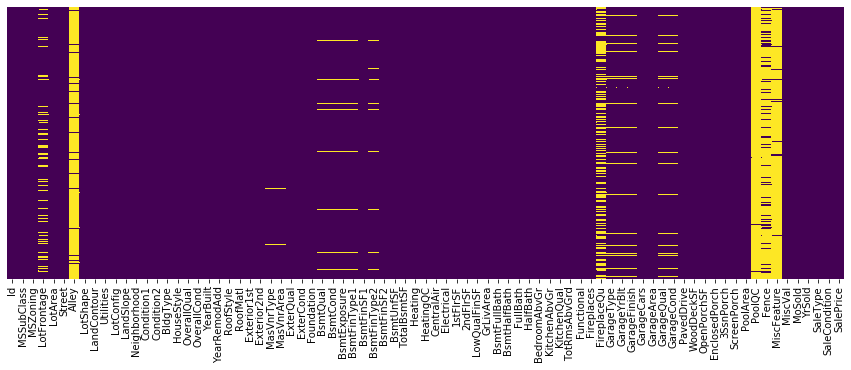

In [5]:
#Heatmap to see columns with high proportion of nulls
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

In [6]:
#Finding columns with largest % of NULL values
na_cols = df.isnull().sum()/df.shape[0]
na_cols.sort_values(ascending=False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
                   ...   
CentralAir       0.000000
SaleCondition    0.000000
Heating          0.000000
TotalBsmtSF      0.000000
Id               0.000000
Length: 81, dtype: float64

In [7]:
#See count of different 'Fence' categories
df.groupby('Fence').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Fence,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GdPrv,59,59,59,48,59,59,5,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,58,58,58,58,59,58,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,36,58,58,58,59,59,58,58,59,59,59,59,59,59,59,4,5,59,59,59,59,59,59
GdWo,54,54,54,42,54,54,3,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,23,50,50,50,54,54,50,50,54,54,54,54,54,54,54,0,4,54,54,54,54,54,54
MnPrv,157,157,157,128,157,157,9,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,154,154,154,154,157,154,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,68,146,146,146,157,157,146,146,157,157,157,157,157,157,157,2,14,157,157,157,157,157,157
MnWw,11,11,11,10,11,11,1,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,3,11,11,11,11,11,11,11,11,11,11,11,11,11,11,0,1,11,11,11,11,11,11


In [8]:
#Created feature "Fence_Present" for if Fence is present
df.loc[df['Fence'].isnull()  == True,'Fence_Present'] = 0
df.loc[df['Fence'].isnull() == False,'Fence_Present'] = 1
df.drop(columns='Fence',inplace=True)

In [9]:
df.groupby('Fence_Present').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Fence_Present,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1179,1179,1179,973,1179,1179,73,1179,1179,1179,1179,1179,1179,1179,1179,1179,1179,1179,1179,1179,1179,1179,1179,1179,1179,1171,1171,1179,1179,1179,1146,1146,1145,1146,1179,1145,1179,1179,1179,1179,1179,1179,1178,1179,1179,1179,1179,1179,1179,1179,1179,1179,1179,1179,1179,1179,1179,640,1114,1114,1114,1179,1179,1114,1114,1179,1179,1179,1179,1179,1179,1179,1,30,1179,1179,1179,1179,1179,1179
1.0,281,281,281,228,281,281,18,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,277,277,277,277,281,277,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,130,265,265,265,281,281,265,265,281,281,281,281,281,281,281,6,24,281,281,281,281,281,281


In [10]:
#Deleting PoolQC due to high NAs (and 'PoolArea' column has no NAs), MiscFeature, and Alley, FireplaceQu (# of fireplaces exists in 'Fireplaces')
df.drop(columns=['PoolQC','MiscFeature','Alley','MiscVal','FireplaceQu'],inplace=True)

#Replace NAs with 0 for Lot Frontage
df['LotFrontage'] = df.LotFrontage.fillna(0)

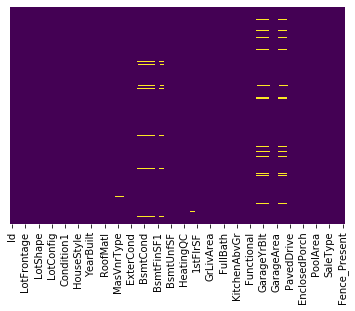

In [11]:
#Updated heatmap to see remaining column NAs
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [13]:
c = df.drop(columns='SalePrice').corr()
print(c[c > .7].stack().reset_index(name='cor').query('abs(cor) <1.0').sort_values('cor',ascending=False))

         level_0       level_1       cor
33    GarageCars    GarageArea  0.882475
34    GarageArea    GarageCars  0.882475
7      YearBuilt   GarageYrBlt  0.825667
30   GarageYrBlt     YearBuilt  0.825667
20     GrLivArea  TotRmsAbvGrd  0.825489
27  TotRmsAbvGrd     GrLivArea  0.825489
14   TotalBsmtSF      1stFlrSF  0.819530
15      1stFlrSF   TotalBsmtSF  0.819530


In [14]:
import pandas_profiling

In [15]:
pandas_profiling.ProfileReport(df)

C:\Users\dwpet\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,76
Number of observations,1460
Total Missing (%),0.5%
Total size in memory,867.0 KiB
Average record size in memory,608.1 B
Numeric,37
Categorical,38
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [16]:
df.isnull().sum().sort_values(ascending=False)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCond      81
GarageQual      81
                ..
CentralAir       0
HeatingQC        0
Heating          0
SalePrice        0
Id               0
Length: 76, dtype: int64

In [17]:
#Create DataFrame 'feature_corr' to identify correlation (and absolute correlation) with Sale Price
feature_corr = pd.DataFrame(df.corrwith(df['SalePrice']))
feature_corr.rename(columns={0:'Correlation'},inplace=True)
feature_corr['Feature'] = feature_corr.index
feature_corr.head()
feature_corr['Abs Correlation'] = abs(feature_corr.Correlation) #Create feature to calculate absolute correlation
feature_corr.sort_values('Abs Correlation',ascending=False).head(20)

,Correlation,Feature,Abs Correlation
SalePrice,1.000000,SalePrice,1.000000
OverallQual,0.790982,OverallQual,0.790982
GrLivArea,0.708624,GrLivArea,0.708624
GarageCars,0.640409,GarageCars,0.640409
GarageArea,0.623431,GarageArea,0.623431
TotalBsmtSF,0.613581,TotalBsmtSF,0.613581
1stFlrSF,0.605852,1stFlrSF,0.605852
FullBath,0.560664,FullBath,0.560664
TotRmsAbvGrd,0.533723,TotRmsAbvGrd,0.533723
YearBuilt,0.522897,YearBuilt,0.522897


In [18]:
garage_cols = [col for col in df.columns if 'arage' in col]
print(garage_cols)

['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']


In [19]:
#To see if same rows are NAs across Garage-related columns
df[df['GarageType'].isna() == True][garage_cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,0,0,NaN,NaN
1407,NaN,NaN,NaN,0,0,NaN,NaN
1449,NaN,NaN,NaN,0,0,NaN,NaN
1450,NaN,NaN,NaN,0,0,NaN,NaN


In [20]:
#Replace Nulls with zeroes for garage columns
df[garage_cols] = df[garage_cols].fillna(0)

In [21]:
df.isna().sum().sort_values(ascending=False)

BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
                ..
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Id               0
Length: 76, dtype: int64

In [22]:
#Grouping Basement columns and replacing NULLs with 0
bsmt_cols = [col for col in df.columns if 'Bsmt' in col]
print(bsmt_cols)
df[df[bsmt_cols].isna() == True][bsmt_cols]
df[bsmt_cols] = df[bsmt_cols].fillna(0)

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']


In [23]:
df.isna().sum().sort_values(ascending=False)

MasVnrType       8
MasVnrArea       8
Electrical       1
Fence_Present    0
ExterCond        0
                ..
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Id               0
Length: 76, dtype: int64

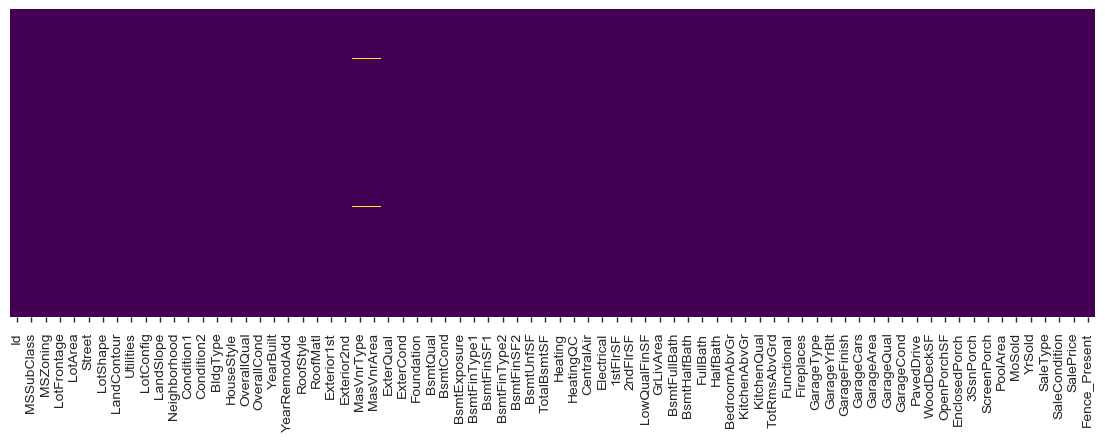

In [24]:
plt.figure(figsize=(14,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
#Sorted features by correlation to price
feature_corr.sort_values('Abs Correlation',ascending=False).head(20)

,Correlation,Feature,Abs Correlation
SalePrice,1.000000,SalePrice,1.000000
OverallQual,0.790982,OverallQual,0.790982
GrLivArea,0.708624,GrLivArea,0.708624
GarageCars,0.640409,GarageCars,0.640409
GarageArea,0.623431,GarageArea,0.623431
TotalBsmtSF,0.613581,TotalBsmtSF,0.613581
1stFlrSF,0.605852,1stFlrSF,0.605852
FullBath,0.560664,FullBath,0.560664
TotRmsAbvGrd,0.533723,TotRmsAbvGrd,0.533723
YearBuilt,0.522897,YearBuilt,0.522897


In [26]:
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [27]:
#Created 'high_corr_columns' with features of over .5 absolute correlation
high_corr_columns = feature_corr[feature_corr['Abs Correlation'] > .5].index

In [28]:
plt.figure(figsize=(19,2))

<Figure size 1900x200 with 0 Axes>

<Figure size 1900x200 with 0 Axes>

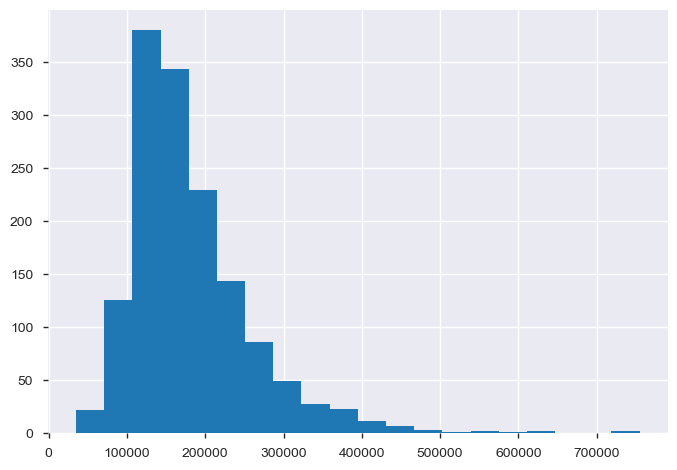

In [29]:
df['SalePrice'].hist(bins=20)

In [30]:
#MODEL TIME

In [31]:
X = df[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF','GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']]

y = df['SalePrice']


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm = LinearRegression()

In [36]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
print(lm.intercept_)

-1316744.8734289273


In [38]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df.head()

,Coefficient
OverallQual,17883.177941
YearBuilt,313.220640
YearRemodAdd,316.586204
TotalBsmtSF,31.737857
1stFlrSF,11.046709


In [39]:
predictions = lm.predict(X_test)

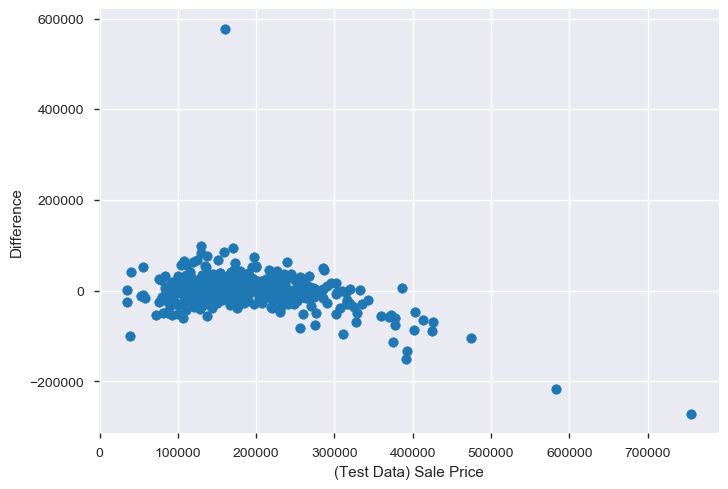

In [40]:
# Scatter chart of y_test data vs. difference between predicted y values and y test
plt.ylabel('Difference')
plt.xlabel('(Test Data) Sale Price')
plt.scatter(y_test,predictions-y_test)

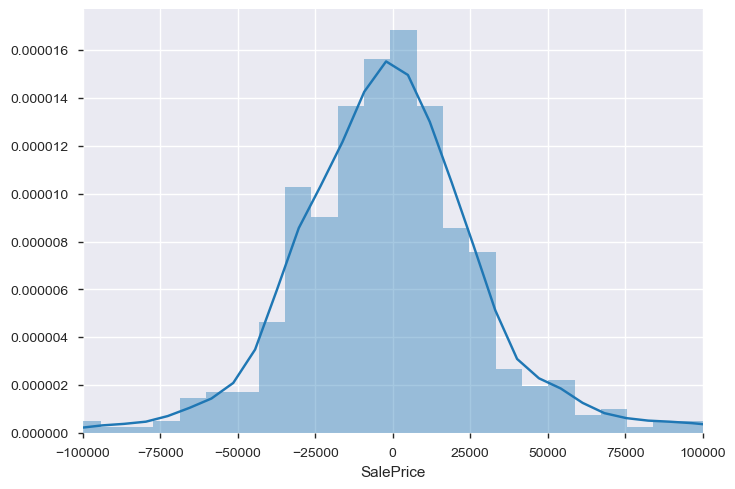

In [41]:
#Distribution of y_test - predicted y_values
plt.xlim(-100000,100000)
sns.distplot((y_test-predictions),bins=100)

In [42]:
from sklearn import metrics

In [43]:
#MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE: ', metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 24322.267185136698
MSE:  1869025390.6019661
RMSE:  43232.22629708036


In [44]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [45]:
df.columns[:41]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir'],
      dtype='object')

In [46]:
len(df.columns)

76

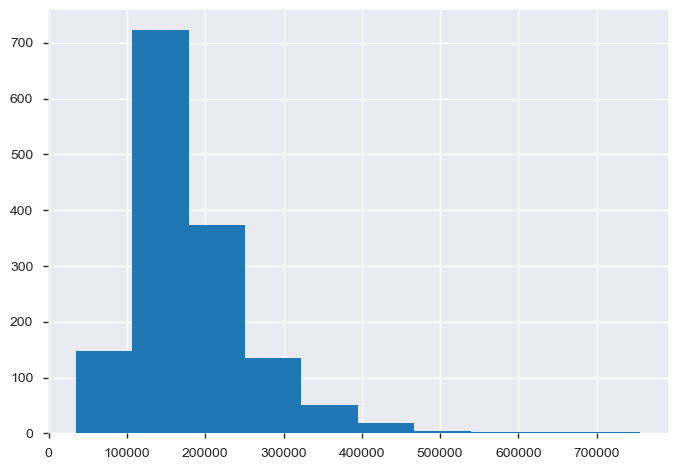

In [47]:
df['SalePrice'].hist()

# NEW SHIT
(NOT OLD SHIT)


In [48]:
#Analysis of MSSubClass Values
df.groupby('MSSubClass')['MSSubClass'].count().sort_values(ascending=False)/1460


MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64

In [49]:
#Dummy variables for MSSubClass, outside of these 4 variables, no category exceeds 5% of houses
df['1s_post_1946'] = df['MSSubClass'].apply(lambda x: 1 if x == 20 else 0)
df['2s_post_1946'] = df['MSSubClass'].apply(lambda x: 1 if x == 60 else 0)
df['1.5s'] = df['MSSubClass'].apply(lambda x: 1 if x==50 else 0)
df['1s_pud'] = df['MSSubClass'].apply(lambda x: 1 if x==120 else 0)

df.drop(columns='MSSubClass',inplace=True) #Drop MSSubClass

In [50]:
#Analysis of MSZoning
print(df.groupby('MSZoning')['MSZoning'].count().sort_values(ascending=False))
#Creating dummy variables for residential low & medium density
df['residential_low_density'] = df['MSZoning'].apply(lambda x: 1 if x == 'RL' else 0)
df['resid_med_density'] = df['MSZoning'].apply(lambda x: 1 if x == 'RM' else 0)

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


In [51]:
print(df.groupby('LotFrontage')['Id'].count())

LotFrontage
0.0      259
21.0      23
24.0      19
30.0       6
32.0       5
        ... 
160.0      1
168.0      1
174.0      2
182.0      1
313.0      2
Name: Id, Length: 111, dtype: int64


In [52]:
#Grouping lot frontage with different bin sizes. Using 'ceiling' function so the '0' group only compares true zeroes
print(df.groupby(np.ceil(df['LotFrontage']/50)*50)['SalePrice'].agg(['median','count']))
print(df.groupby(np.ceil(df['LotFrontage']/20)*20)['SalePrice'].agg(['median','count']))
#Deciding to group lot frontage by 50 since variability is not high between 20s, and to get more IDs per group

             median  count
LotFrontage               
0.0          172400    259
50.0         140000    205
100.0        159500    912
150.0        215000     75
200.0        259000      7
350.0        201000      2
             median  count
LotFrontage               
0.0          172400    259
40.0         141250     98
60.0         130000    349
80.0         166500    470
100.0        223000    200
120.0        234115     54
140.0        184750     17
160.0        215000      7
180.0        274725      3
200.0        259000      1
320.0        201000      2


In [53]:
df['LF_group'] = (np.ceil(df['LotFrontage']/50)*50) #binned Lot Frontage in groups of 50

df.groupby('LF_group').agg({'LF_group':'count','SalePrice':'median'})

df.drop(columns='LotFrontage',inplace=True) #Removing LotFrontage to avoid reduncancy

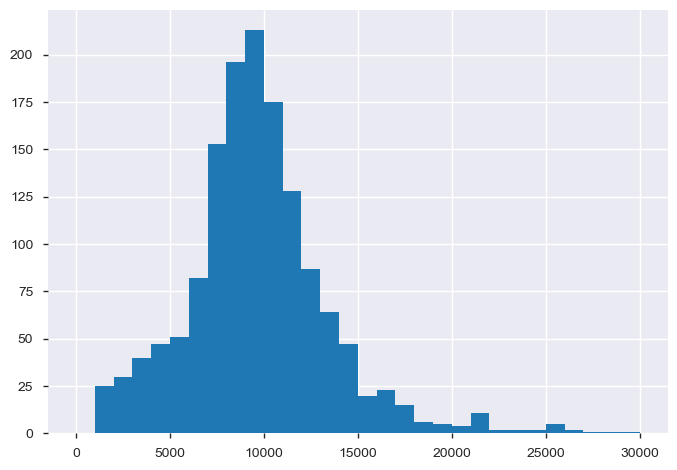

            median  count
LotArea                  
2000.0     92000.0     25
3000.0    154000.0     31
4000.0    170000.0     39
5000.0    142000.0     52
6000.0    117000.0     63
...            ...    ...
71000.0   280000.0      1
116000.0  302000.0      1
159000.0  277000.0      1
165000.0  228950.0      1
216000.0  375000.0      1

[47 rows x 2 columns]


In [54]:
plt.hist(df['LotArea'],bins=30,range=(0,30000))
plt.show()
#Binning LotArea in groups of 1000 sq ft
print(df.groupby(np.ceil(df['LotArea']/1000)*1000)['SalePrice'].agg(['median','count']))
df['LotArea_group'] = np.ceil(df['LotArea']/1000)*1000
df.drop(columns='LotArea',inplace=True)

In [55]:
print(df.groupby('Street')['Id'].count()) 
#Since there's almost no variability, I'm dropping 'Street' variable
df.drop(columns='Street',inplace=True)


Street
Grvl       6
Pave    1454
Name: Id, dtype: int64


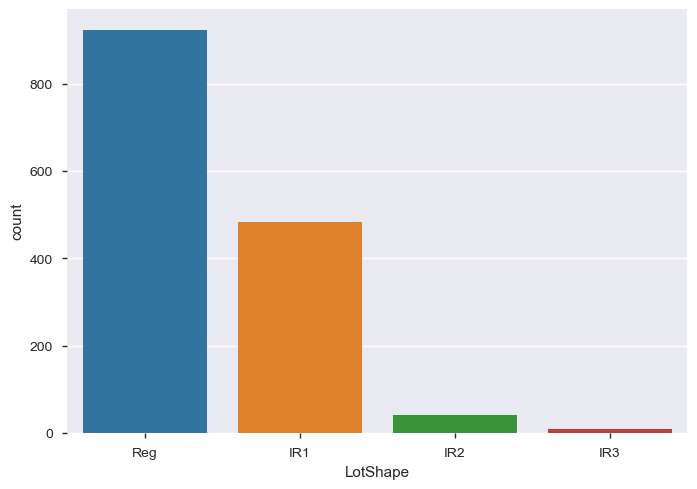

In [56]:
#Alley dropped previously due to High NAs (93%)
sns.countplot(x='LotShape',data=df)
#Given high proportion of 'IR1' when compared to 'IR2' and 'IR3', creating dummy var just to indicate if LotShape is Regular or Irregular
plt.show()
df['Regular_LotShape'] = df['LotShape'].apply(lambda x:1 if x == 'Reg' else 0)
df.drop(columns='LotShape',inplace=True) #Removed now-redundant 'LotShape' variable

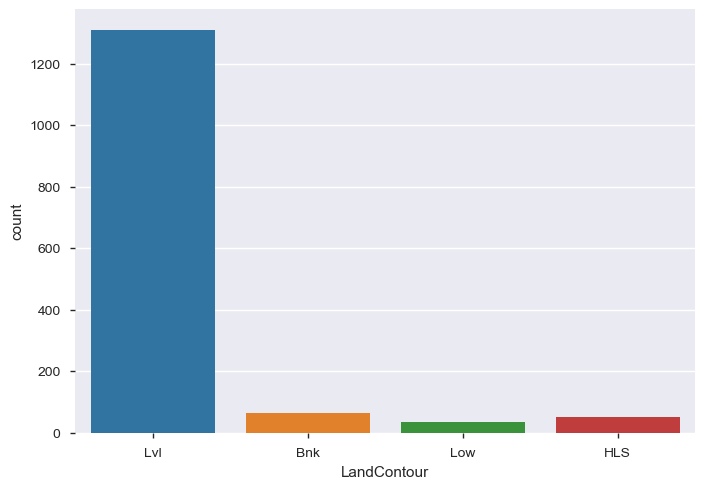

              count           mean            std      min       25%  \
LandContour                                                            
Bnk            63.0  143104.079365   49361.244074  52500.0  113000.0   
HLS            50.0  231533.940000  101790.139741  82500.0  151750.0   
Low            36.0  203661.111111   83935.353620  39300.0  143000.0   
Lvl          1311.0  180183.746758   78463.567918  34900.0  130000.0   

                  50%        75%       max  
LandContour                                 
Bnk          139400.0  171250.00  315000.0  
HLS          222250.0  281347.25  538000.0  
Low          190000.0  263750.00  385000.0  
Lvl          162900.0  212000.00  755000.0  


In [57]:
sns.countplot(data=df,x='LandContour')
plt.show()
print(df.groupby('LandContour')['SalePrice'].describe())
#HLS and Low have similar SalePrice, but Bnk is much lower. Will create 2 Dummy groups (Lvl, Bnk, and assumed (HLS&Low))
df['Lvl_LandContour'] = df['LandContour'].apply(lambda x:1 if x == 'Lvl' else 0)
df['Bnk_LandContour'] = df['LandContour'].apply(lambda x:1 if x == 'Bnk' else 0)
df.drop(columns='LandContour',inplace=True) #Drop now-redundant 'LandContour' feature

In [58]:
#Skipped a couple of attributes, go back

In [59]:
df.Neighborhood.nunique()

25

In [60]:
print(df.groupby('Neighborhood')['SalePrice'].describe())

              count           mean            std       min       25%  \
Neighborhood                                                            
Blmngtn        17.0  194870.882353   30393.229219  159895.0  174000.0   
Blueste         2.0  137500.000000   19091.883092  124000.0  130750.0   
BrDale         16.0  104493.750000   14330.176493   83000.0   91000.0   
BrkSide        58.0  124834.051724   40348.689270   39300.0  100500.0   
ClearCr        28.0  212565.428571   50231.538993  130000.0  183750.0   
...             ...            ...            ...       ...       ...   
SawyerW        59.0  186555.796610   55651.997820   76000.0  145500.0   
Somerst        86.0  225379.837209   56177.555888  144152.0  177975.0   
StoneBr        25.0  310499.000000  112969.676640  170000.0  213500.0   
Timber         38.0  242247.447368   64845.651549  137500.0  186900.0   
Veenker        11.0  238772.727273   72369.317959  162500.0  184250.0   

                   50%        75%       max  
Neig

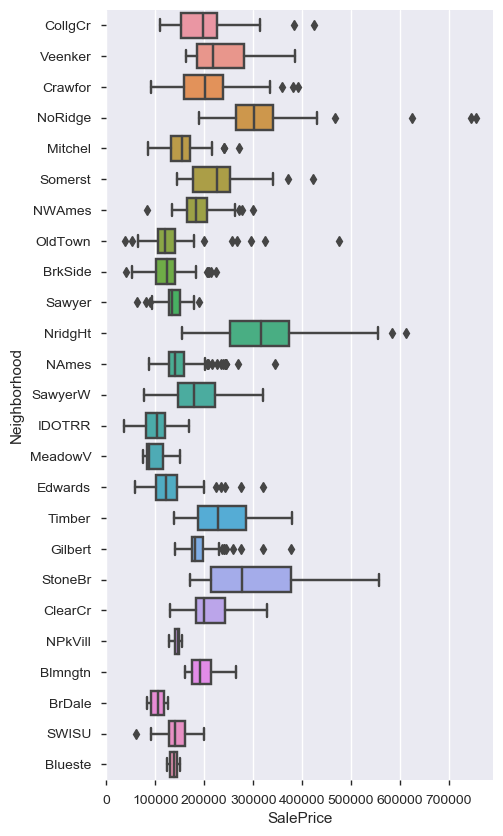

In [61]:
plt.figure(figsize=(5,10))
sns.boxplot(y='Neighborhood',x='SalePrice',data=df,)

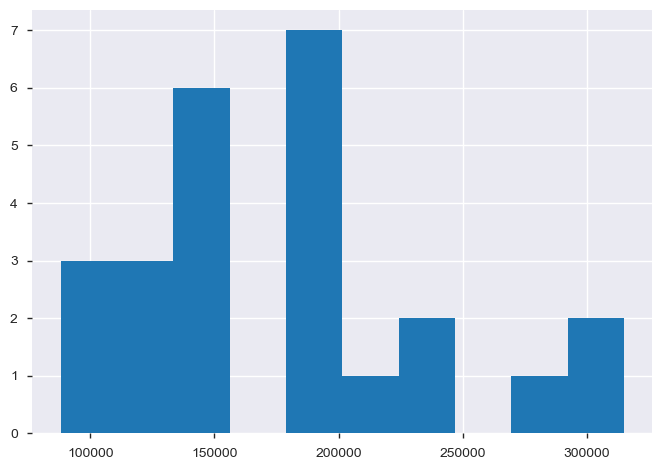

In [62]:
df.groupby('Neighborhood')['SalePrice'].median().hist(bins=10)

In [63]:
df.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=True)

Neighborhood
MeadowV     88000
IDOTRR     103000
BrDale     106000
OldTown    119000
Edwards    121750
            ...  
Somerst    225500
Timber     228475
StoneBr    278000
NoRidge    301500
NridgHt    315000
Name: SalePrice, Length: 25, dtype: int64

In [64]:
nb_medians = pd.DataFrame(data=df.groupby('Neighborhood')['SalePrice'].median())
nb_medians.head(15).sort_values('SalePrice')
#df['Elite_Neighborhood'] = df.Neighborhood.apply(lambda x : 1 if x in ['NridgHt','NoRidge','StoneBr'] else 0)

,SalePrice
Neighborhood,
MeadowV,88000
IDOTRR,103000
BrDale,106000
Edwards,121750
BrkSide,124300
Blueste,137500
NAmes,140000
NPkVill,146000
Mitchel,153500


In [65]:
nb_medians['lc_neighborhoods'] = nb_medians.SalePrice.apply(lambda x : nb_medians.index if x < 155000 else 0)
nb_medians['lc_neighborhoods'].index

Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU',
       'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object', name='Neighborhood')

In [66]:
df['Elite_Neighborhood'] = df.Neighborhood.apply(lambda x : 1 if x in ['NridgHt','NoRidge','StoneBr'] else 0)
df['LowCost_Neighborhood'] = df.Neighborhood.apply(lambda x : 1 if x in ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel'] else 0)

In [67]:
print(df.groupby('Condition1')['SalePrice'].agg(['median','count']))
#High proportion of Normal Condition, so dropping variable
df.drop(columns='Condition1',inplace=True)

            median  count
Condition1               
Artery      119550     48
Feedr       140000     81
Norm        166500   1260
PosA        212500      8
PosN        200000     19
RRAe        142500     11
RRAn        171495     26
RRNe        190750      2
RRNn        214000      5


In [68]:
print(df.groupby('Condition2')['SalePrice'].describe())
#Most variables are 'Normal', so will drop Condition2
df.drop(columns='Condition2',inplace=True)

             count           mean            std       min       25%  \
Condition2                                                             
Artery         2.0  106500.000000   16263.455967   95000.0  100750.0   
Feedr          6.0  121166.666667   33544.994659   79500.0   95500.0   
Norm        1445.0  181169.405536   79337.735547   34900.0  130000.0   
PosA           1.0  325000.000000            NaN  325000.0  325000.0   
PosN           2.0  284875.000000  141598.132933  184750.0  234812.5   
RRAe           1.0  190000.000000            NaN  190000.0  190000.0   
RRAn           1.0  136905.000000            NaN  136905.0  136905.0   
RRNn           2.0   96750.000000   39951.533137   68500.0   82625.0   

                 50%       75%       max  
Condition2                                
Artery      106500.0  112250.0  118000.0  
Feedr       127500.0  137000.0  167500.0  
Norm        163500.0  214000.0  755000.0  
PosA        325000.0  325000.0  325000.0  
PosN        284875.0 

In [69]:
df.groupby('BldgType')['SalePrice'].describe() #High % are '1Fam', so I'm removing variable

,count,mean,std,min,25%,50%,75%,max
BldgType,,,,,,,,
1Fam,1220.0,185763.807377,82648.502922,34900.0,131475.0,167900.0,222000.0,755000.0
2fmCon,31.0,128432.258065,35458.545158,55000.0,106875.0,127500.0,142500.0,228950.0
Duplex,52.0,133541.076923,27833.249197,82000.0,118375.0,135980.0,145000.0,206300.0
Twnhs,43.0,135911.627907,41013.222080,75000.0,95750.0,137500.0,168750.0,230000.0
TwnhsE,114.0,181959.342105,60626.108918,75500.0,143187.5,172200.0,207375.0,392500.0


In [70]:
df.drop(columns='BldgType',inplace=True)

            count           mean            std       min       25%       50%  \
HouseStyle                                                                      
1.5Fin      154.0  143116.740260   54277.941119   37900.0  114625.0  132000.0   
1.5Unf       14.0  110150.000000   19036.473090   76000.0   98175.0  111250.0   
1Story      726.0  175985.477961   77055.715011   34900.0  127000.0  154750.0   
2.5Fin        8.0  220000.000000  118211.976671  104000.0  164250.0  194000.0   
2.5Unf       11.0  157354.545455   63934.128032  101000.0  125000.0  133900.0   
2Story      445.0  210051.764045   87339.213570   40000.0  159500.0  190000.0   
SFoyer       37.0  135074.486486   30480.898192   75500.0  127500.0  135960.0   
SLvl         65.0  166703.384615   38305.161339   91000.0  145000.0  164500.0   

                 75%       max  
HouseStyle                      
1.5Fin      159325.5  410000.0  
1.5Unf      120500.0  139400.0  
1Story      209350.0  611657.0  
2.5Fin      223750.0  47

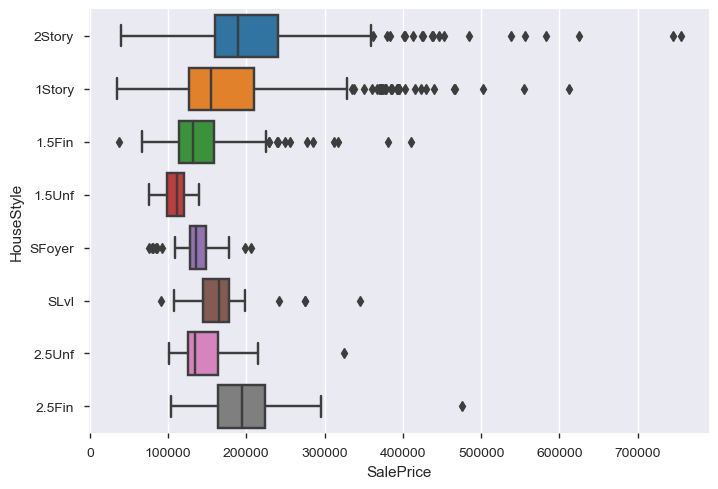

In [71]:
print(df.groupby('HouseStyle')['SalePrice'].describe())

sns.boxplot(data=df,y='HouseStyle',x='SalePrice')

In [73]:
c = df.drop(columns='SalePrice').corr()
cdf = c[(c > .5)].stack().reset_index(name='cor').query('abs(cor) <1.0').sort_values('cor',ascending=False)

In [30]:
#MODEL TIME

In [31]:
X = df['']

y = df['SalePrice']


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm = LinearRegression()

In [36]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
print(lm.intercept_)

-1316744.8734289273


In [38]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df.head()

,Coefficient
OverallQual,17883.177941
YearBuilt,313.220640
YearRemodAdd,316.586204
TotalBsmtSF,31.737857
1stFlrSF,11.046709


In [39]:
predictions = lm.predict(X_test)

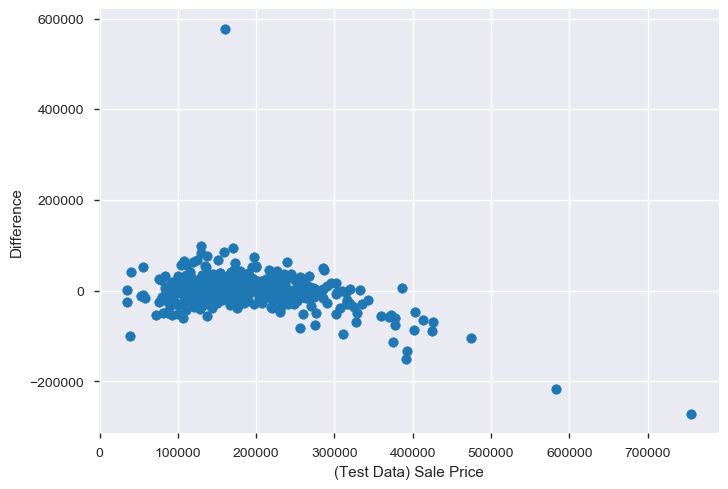

In [40]:
# Scatter chart of y_test data vs. difference between predicted y values and y test
plt.ylabel('Difference')
plt.xlabel('(Test Data) Sale Price')
plt.scatter(y_test,predictions-y_test)

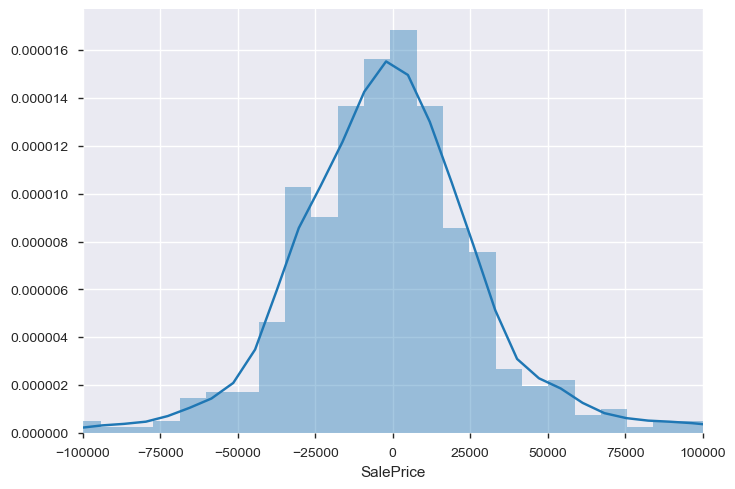

In [41]:
#Distribution of y_test - predicted y_values
plt.xlim(-100000,100000)
sns.distplot((y_test-predictions),bins=100)

In [42]:
from sklearn import metrics

In [43]:
#MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE: ', metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 24322.267185136698
MSE:  1869025390.6019661
RMSE:  43232.22629708036
